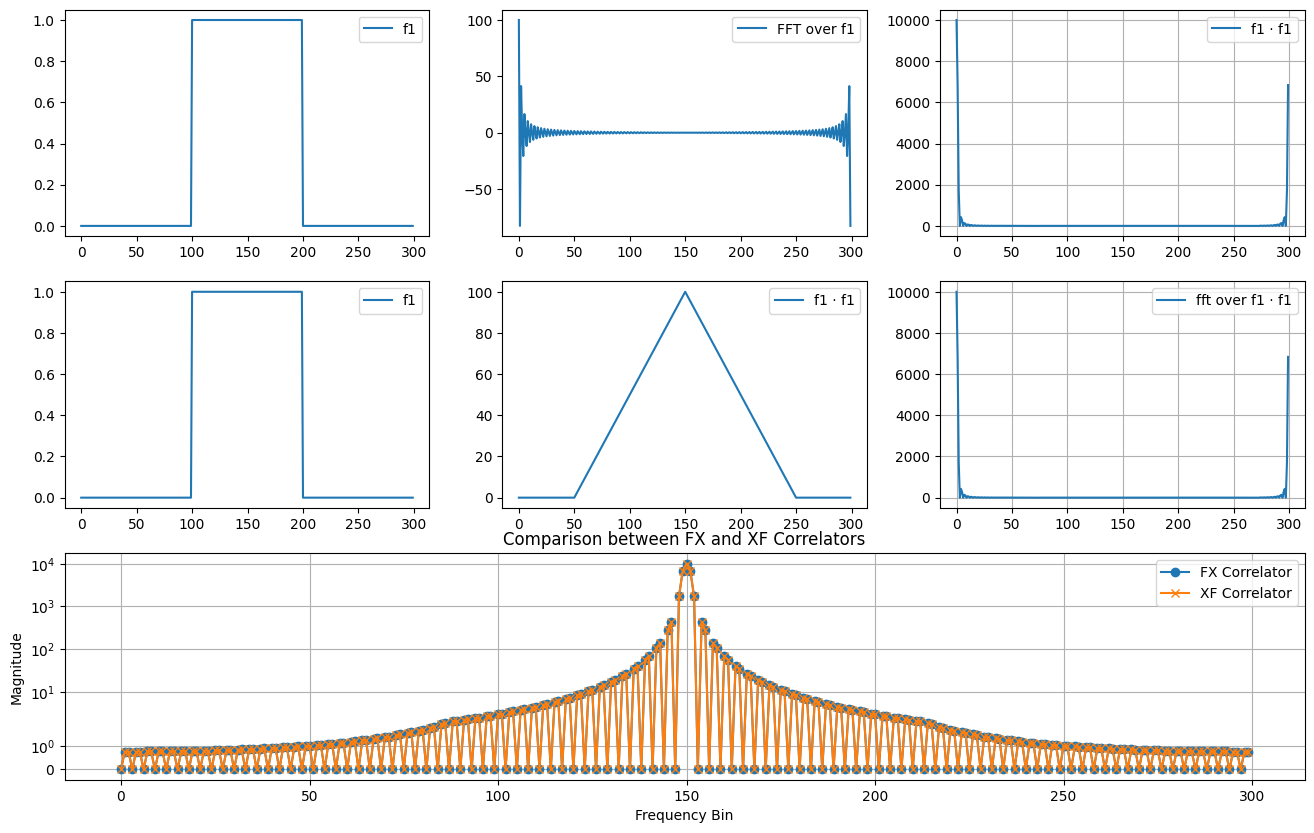

In [40]:
#Only inline plots are visible on iframes %matplotlib inline
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Generate two sinusoidal signals with a slight phase shift
samples = 300
half_section = int(samples/2)
freq = 10

compact_function = np.zeros(samples)
compact_function[100:200]= compact_function[100:200]+1

# FX Correlator
f_transformed_signal = np.fft.fft(compact_function)
fx_correlated = f_transformed_signal*f_transformed_signal 

# XF Correlator
x_convolve = np.convolve(compact_function , compact_function, "same")
xf_correlated = np.fft.fft(x_convolve)

# Visualize



#Prepare simetrilcal "around zero" graph
fx_abs = np.abs(fx_correlated)
xf_abs = np.abs(xf_correlated)
symetrical_fx = np.concatenate(( fx_abs[half_section:], fx_abs[:half_section] )) 
symetrical_xf = np.concatenate(( xf_abs[half_section:], xf_abs[:half_section] )) 

fig = plt.figure(figsize=(16,10))
#fig.tight_layout()
plt.subplot(3,3,1)
plt.plot(compact_function, label= 'f1' )
plt.legend()
plt.subplot(3,3,2)
plt.plot(f_transformed_signal, label= 'FFT over f1')
plt.legend()
plt.subplot(3,3,3)
plt.plot(fx_abs, label= 'f1 · f1')
plt.legend()
plt.grid(True)

plt.subplot(3,3,4)
plt.plot(compact_function , label= 'f1')
plt.legend()
plt.subplot(3,3,5)
plt.plot(x_convolve, label= 'f1 · f1')
plt.legend()
plt.legend()
plt.subplot(3,3,6)
plt.plot(fx_abs, label= 'fft over f1 · f1')
plt.legend()
plt.grid(True)


splt = plt.subplot(3,1,3)
plt.plot(symetrical_fx, label='FX Correlator', marker='o')#,linestyle = 'None')
plt.plot(symetrical_xf, label='XF Correlator', marker='x')#,linestyle = 'None')
plt.xlabel('Frequency Bin')
plt.ylabel('Magnitude')
plt.yscale("symlog")
plt.legend()
plt.title('Comparison between FX and XF Correlators')
plt.grid(True)

plt.ion()
plt.show()
